In [6]:
import os 
os.environ['CUDA_VISIBLE_DEVICES'] = '0'

from utils.utils_cpp import cpp_predictor
# from utils.utils_cpp import cpp_generator
# from utils.utils_cpp import cpp_optimizer
from utils.utils_common.activator import Activation

#### Filepaths

*_DATA_PATH : For datasets, to be used when training and sampling <br>
*_MODEL_PATH : For models, to be used when training to save the model, otherwise to load pre-trained models <br>
PREDICTOR_STATS_PATH : To save/load statistics for predictor training dataset <br>

SEQ_MAX : Maximum sequence length for predictor <br>
SEED_SEQ_LENGTH : Seed sequence length for generator <br>

SMILES_PATH : SMILES for monomers <br>
FP_RADIUS : Radius of topological exploration for fingerprint <br>
FP_BITS : Size of fingerprint bit-vector

In [7]:
# GENERATOR_DATA_PATH = './dataset/data_cpp/cpp_generator_dataset.txt'
# GENERATOR_MODEL_PATH = './model/model_cpp/cpp_generator.hdf5'
# SEED_SEQ_LENGTH = 10

PREDICTOR_DATA_PATH = './dataset/data_gene/gene_predictor_dataset.csv'
PREDICTOR_MODEL_PATH = './model/model_gene/gene_predictor.hdf5'
PREDICTOR_STATS_PATH = './dataset/data_gene/gene_predictor_dataset_stats.json'

SMILES_PATH = './dataset/data_gene/nuc2smiles.json'
FP_RADIUS = 3
FP_BITS = 2048
SEQ_MAX = 256 #108

#### Generator

Creating an instance for Generator class with the dataset. <br>
Training and saving the generator

In [8]:
# generator = cpp_generator.Generator(data_path = GENERATOR_DATA_PATH, seq_length = SEED_SEQ_LENGTH)

# generator.train_model(
#     model_params = {
#         'save_checkpoint': True,
#         'checkpoint_filepath': './model/'
#         }
# )

#### Predictor

Creating an instance for Predictor class with the dataset and other parameters. <br>
Training and saving the predictor

Loading Data for Training of Predictor
Featurizing Data for Predictor
Creating Model for Predictor
Train on 6696 samples, validate on 1674 samples
Epoch 1/2
6696/6696 [==============================] - 81s 12ms/sample - loss: 1.7838 - val_loss: 0.5587
Epoch 2/2
6696/6696 [==============================] - 82s 12ms/sample - loss: 0.5486 - val_loss: 0.6952


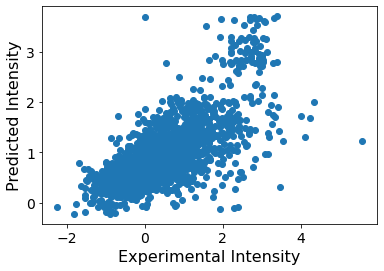

In [9]:
predictor = cpp_predictor.Predictor(
    data_path = PREDICTOR_DATA_PATH,
    smiles_path = SMILES_PATH,
    fp_radius = FP_RADIUS,
    fp_bits = FP_BITS,
    seq_max = SEQ_MAX
)

predictor.train_model(
    model_params = {
        'save_checkpoint': True,
        'checkpoint_filepath': './model/'
        }
)

In [14]:
predictor.model(predictor.val)

AttributeError: 'Predictor' object has no attribute 'val'

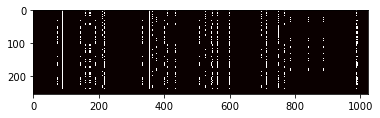

In [12]:
# predictor.X[1]

import matplotlib.pyplot as plt
import numpy as np

a = predictor.X[1]

plt.imshow(a, cmap='hot', interpolation='nearest')
plt.show()

#### Optimizer

Creating an instance for Optimizer class with the pre-trained models and data files. <br>
Sampling sequences using a pre-trained generator to seed the genetic algorithm. <br>
Optimizing the seed sequences.

In [5]:
# optimizer = cpp_optimizer.Optimizer(
#     model_path = PREDICTOR_MODEL_PATH,
#     data_path = PREDICTOR_DATA_PATH,
#     smiles_path = SMILES_PATH,
#     stats_path = PREDICTOR_STATS_PATH,
#     fp_radius = FP_RADIUS,
#     fp_bits = FP_BITS,
#     seq_max = SEQ_MAX
# )

In [6]:
# generator = cpp_generator.Generator(
#     model_path = GENERATOR_MODEL_PATH,
#     data_path = GENERATOR_DATA_PATH,
#     seq_length = SEED_SEQ_LENGTH
# )

In [7]:
list_seeds = generator.generate_seed(n_seeds = 2, seed_length = 30)

Generating Seeds for Optimizer
Generating Seed  1
Generating Seed  2


In [8]:
df = optimizer.optimize(list_seeds)
df.head(2)

Setting up Optimizer
Optimizing Seed  1
Optimizing Seed  2
Post-Processing Optimized Sequences


,sequences,intensity,length,relative_Arg,relative_charge
73,LXXRHFPPKCHHFCLKKPPLKKNCTHTXXLGBNXGBCG,11.7136,38,0.0263158,0.237084
79,FXXCHFPPKCHHFCLKKPPXKKNCTHTXXLGBNXGBNGK,11.4768,39,0,0.230962


#### Activation Analysis

Visualizing the gradient activation of peptide sequence (ex. penetratin) based on pre-trained predictor.

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Use tf.cast instead.
Positive activation for feature map


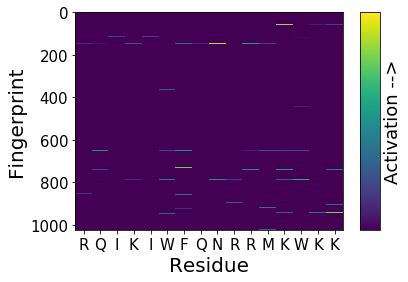

Positive activation averaged over residues


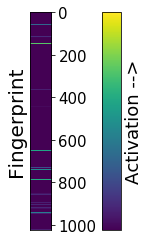

Positive activation averaged over fingerprints


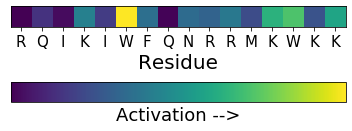

In [8]:
activator = Activation(
    mode = 'cpp',
    model_path = PREDICTOR_MODEL_PATH,
    smiles_path = SMILES_PATH,
    stats_path = PREDICTOR_STATS_PATH,
    fp_radius = FP_RADIUS,
    fp_bits = FP_BITS,
    seq_max = SEQ_MAX
)

activator.analyze('RQIKIWFQNRRMKWKK')